In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import re
import collections
import string
from collections import OrderedDict
from mpl_toolkits import mplot3d
import random

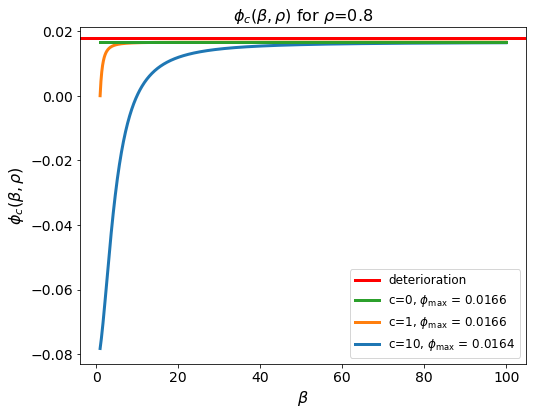

In [5]:
phic_beta = lambda beta, c: 0.083*(1.-((6.*(c/beta)**2)/(5. + (c/beta)**2)))*(1-0.8)

betas = [b for b in np.arange(1,100,0.1)]
phi_c10_b = [phic_beta(b, 10) for b in betas]
phi_c1_b = [phic_beta(b, 1) for b in betas]
phi_c0_b = [phic_beta(b, 0) for b in betas]

fig, ax = plt.subplots()
fig.set_size_inches(8, 6.2)
titleSize = 16
labelSize = 16
numbersize = 14
legendsize = 10
IDsize=12
det_r = 0.018

ax.plot(betas, phi_c10_b, label=r'c=10, $\phi_{\max}$ = %.4f'%(max(phi_c10_b)), linewidth=3)
ax.plot(betas, phi_c1_b, label='c=1, $\phi_{\max}$ = %.4f'%(max(phi_c1_b)), linewidth=3)
ax.plot(betas, phi_c0_b, label='c=0, $\phi_{\max}$ = %.4f'%(max(phi_c0_b)), linewidth=3)

ax.axhline(det_r, label='deterioration', color='r', linewidth=3)
ax.set_xlabel(r'$\beta$', fontsize=labelSize)
ax.set_ylabel(r'$\phi_c(\beta, \rho)$', fontsize=labelSize)
plt.title(r'$\phi_c(\beta, \rho)$ for $\rho$=0.8', fontsize=titleSize)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],fontsize='large')
ax.xaxis.set_tick_params(labelsize=numbersize)
ax.yaxis.set_tick_params(labelsize=numbersize)
plt.savefig('varying_beta.pdf', bbox_inches='tight', dpi=300)

plt.show()

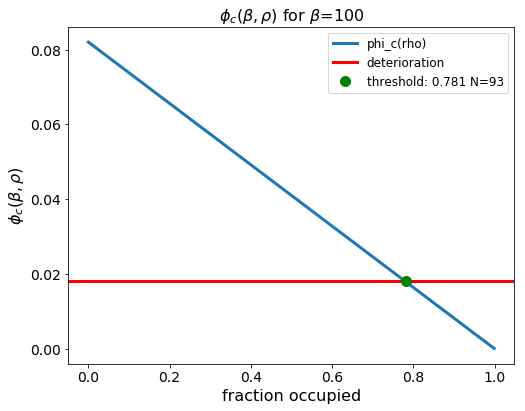

In [9]:
phic_rho = lambda beta, c, r: 0.083*(1.-((6.*(c/beta)**2)/(5. + (c/beta)**2)))*(1.-r)
rhos = [r for r in np.arange(0.,1.,0.001)]
phic_rhos = [phic_rho(100., 10., r) for r in rhos]

det_r = 0.018
fig, ax = plt.subplots()
fig.set_size_inches(8, 6.2)
titleSize = 16
labelSize = 16
numbersize = 14
legendsize = 10
IDsize=12
threshold=0
for i in range(len(phic_rhos)):
    if (phic_rhos[i]-det_r)**2 < 1e-8: threshold=(rhos[i])

threshold_n = int(threshold*120)       
ax.plot(rhos, phic_rhos, linewidth=3., label='phi_c(rho)')
ax.axhline(det_r, label='deterioration', color='r', linewidth=3)
ax.plot(threshold, det_r, 'go', markersize=10, label='threshold: '+str(threshold)+' N='+str(threshold_n))

ax.set_xlabel(r'fraction occupied', fontsize=labelSize)
ax.set_ylabel(r'$\phi_c(\beta, \rho)$', fontsize=labelSize)
plt.title(r'$\phi_c(\beta, \rho)$ for $\beta$=100', fontsize=titleSize)
plt.legend(fontsize='large')
ax.xaxis.set_tick_params(labelsize=numbersize)
ax.yaxis.set_tick_params(labelsize=numbersize)
plt.savefig('varying_rho.pdf', bbox_inches='tight', dpi=300)
plt.show()

[[-0.4147511244377811 -0.40905031151357113 -0.3962926282607814 ... -- --
  --]
 [-0.4131246494399859 -0.40744619264489046 -0.3947385395225038 ... -- --
  --]
 [-0.41149817444219067 -0.4058420737762098 -0.39318445078422626 ... -- --
  --]
 ...
 [-0.0032529499955904284 -0.003208237737361331 -0.003108177476555137 ...
  -- -- --]
 [-0.0016264749977952142 -0.0016041188686806655 -0.0015540887382775685
  ... -- -- --]
 [-0.0 -0.0 -0.0 ... 0.0 0.0 0.0]]


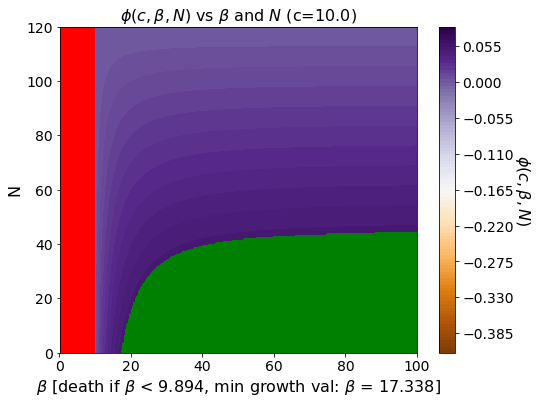

In [13]:
#this varies both fraction occupied and beta
npoints = 256
c=10.
K=120
det_r = 0.0516
rhos = np.linspace(0., 120.0, npoints)
betas = np.linspace(0.1, 100, npoints)

def phi_c(beta, n):
    return 0.083*(1. - ((6*(c/beta)**2)/(5. + (c/beta)**2)))*(1-n/K)

B, R = np.meshgrid(betas, rhos)
P = phi_c(B, R)
d = np.ma.array(P, mask=P<det_r)
nz = np.ma.array(P, mask=(P > 0)) #this masks all bits where P > 0, so only the negative values are included
print(nz)

#fig = plt.figure()
#ax = plt.axes(projection="3d")
#ax.plot_wireframe(B, R, P, color='green')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')

#plt.show()
id_death = P[0] < 0
id_growth = P[0] > det_r
beta_death = '%.3f'%(betas[np.amax(np.where(id_death))]) if np.any(np.where(id_death)) else '0'
beta_minGrowth = '%.3f'%betas[np.amin(np.where(id_growth))]

#print(nz[2])

fig, ax = plt.subplots(figsize=(8,6))
#plt.figure(figsize=(8,6))
cs_neutral = ax.contourf(B, R, P, 100, cmap='PuOr')
cbar = fig.colorbar(cs_neutral);
cbar.ax.get_yaxis().labelpad = 18
cbar.ax.set_ylabel(r'$\phi(c, \beta, N)$', rotation=270, fontsize=labelSize)
#ax.xaxis.set_tick_params(labelsize=numbersize)
cbar.ax.yaxis.set_tick_params(labelsize=numbersize)

cs_growth = ax.contourf(B, R, d, colors='green')
cs_death = ax.contourf(B, R, nz, colors='red')

ax.set_xlabel(r"$\beta$ [death if $\beta$ < "+beta_death+r", min growth val: $\beta$ = "+beta_minGrowth+']', fontsize = labelSize)
#ax.set_xlabel(r"$\beta$", fontsize = labelSize)
ax.set_ylabel("N", fontsize = labelSize)
ax.set_title(r"$\phi(c,\beta, N)$ vs $\beta$ and $N$ (c="+str(c)+')', fontsize=titleSize)
ax.xaxis.set_tick_params(labelsize=numbersize)
ax.yaxis.set_tick_params(labelsize=numbersize)
plt.savefig('phi_contours_c='+str(int(c))+'.pdf', bbox_inches='tight', dpi=300)
